In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")
    
import os, sys
import glob

sys.path.append('/dartfs/rc/lab/F/FinnLab/tommy/isc_asynchrony_behavior/code/utils/')

from config import *
import analysis_utils as utils

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /dartfs/rc/lab/F/FinnLab/tommy/models/token
Login successful


In [1]:
from datasets import load_dataset

ds = load_dataset("amphion/Emilia-Dataset",  data_files={"en": "EN/EN-B00000*.tar"}, split="en")
# ds = load_dataset("MLCommons/peoples_speech", config='cc-by-clean')

Loading dataset shards:   0%|          | 0/37 [00:00<?, ?it/s]

In [1]:
from datasets import load_dataset, DatasetDict, Dataset, Features
import json
from collections import defaultdict
import random

def load_emilia_speaker_split(
    data_files: dict = {"en": "EN/EN-B00000*.tar"},
    split="en",
    train_ratio: float = 0.8,
    val_ratio: float = 0.1,
    test_ratio: float = 0.1,
    seed: int = 42
) -> DatasetDict:
    """
    Load the Emilia dataset with speaker-aware train/val/test splits.
    
    Args:
        data_files: Dict specifying which files to load (default: {"en": "EN/EN-B00000*.tar"})
        train_ratio: Proportion of speakers for training (default: 0.8)
        val_ratio: Proportion of speakers for validation (default: 0.1)
        test_ratio: Proportion of speakers for testing (default: 0.1)
        seed: Random seed for reproducibility (default: 42)
    
    Returns:
        DatasetDict containing train, validation, and test splits
    """
    # Load the original dataset
    dataset = load_dataset(
        "amphion/Emilia-Dataset",
        data_files=data_files,
        split="en"
    )
    
    # Group samples by speaker
    speaker_to_indices = defaultdict(list)
    for idx, item in enumerate(dataset):
        metadata = item['json']
        speaker = metadata.get('speaker')
        if speaker:
            speaker_to_indices[speaker].append(idx)
    
    # Calculate split sizes
    total_speakers = len(speaker_to_indices)
    n_train = int(total_speakers * train_ratio)
    n_val = int(total_speakers * val_ratio)
    n_test = total_speakers - n_train - n_val
    
    # Create speaker splits
    random.seed(seed)
    speakers = list(speaker_to_indices.keys())
    random.shuffle(speakers)
    
    train_speakers = speakers[:n_train]
    val_speakers = speakers[n_train:n_train + n_val]
    test_speakers = speakers[n_train + n_val:]
    
    # Create index lists for each split
    train_indices = [idx for speaker in train_speakers for idx in speaker_to_indices[speaker]]
    val_indices = [idx for speaker in val_speakers for idx in speaker_to_indices[speaker]]
    test_indices = [idx for speaker in test_speakers for idx in speaker_to_indices[speaker]]
    
    # Create the split datasets
    train_dataset = dataset.select(train_indices)
    val_dataset = dataset.select(val_indices)
    test_dataset = dataset.select(test_indices)
    
    # Print split statistics
    print(f"Total speakers: {total_speakers}")
    print(f"Train: {len(train_speakers)} speakers, {len(train_indices)} samples")
    print(f"Val: {len(val_speakers)} speakers, {len(val_indices)} samples")
    print(f"Test: {len(test_speakers)} speakers, {len(test_indices)} samples")
    
    # Return as DatasetDict
    return DatasetDict({
        'train': train_dataset,
        'validation': val_dataset,
        'test': test_dataset
    })

In [3]:
ds = load_emilia_speaker_split(
    data_files={"en": "EN/EN-B00000*.tar"},
    split="en[:50000]"
)

Loading dataset shards:   0%|          | 0/37 [00:00<?, ?it/s]

Exception ignored from cffi callback <function SoundFile._init_virtual_io.<locals>.vio_read at 0x1528fbb25a80>:
Traceback (most recent call last):
  File "/dartfs/rc/lab/F/FinnLab/tommy/conda/envs/prosody/lib/python3.12/site-packages/soundfile.py", line 1241, in vio_read
    @_ffi.callback("sf_vio_read")

KeyboardInterrupt: 


In [3]:
extractor = WaveletProminenceExtractor(

    root_dir = '/dartfs/rc/lab/F/FinnLab/datasets/gigaspeech/prosody/',
    data_dir = 'validation'
)

In [1]:
    
%load_ext autoreload
%autoreload 2
import os, sys
import glob

sys.path.append('/dartfs/rc/lab/F/FinnLab/tommy/isc_asynchrony_behavior/code/utils/')
sys.path.append('/dartfs/rc/lab/F/FinnLab/tommy/isc_asynchrony_behavior/code/modeling/joint-clm-prosody/')

from config import *
import analysis_utils as utils

from src.data.wavelet_prominence_datamodule import WaveletDataModule
from src.models.joint_clm_prosody import ProsodyCausalLM 
from src.data.prominence_regression_datamodule import ProminenceRegressionDataModule


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /dartfs/rc/lab/F/FinnLab/tommy/models/token
Login successful


/dartfs/rc/lab/F/FinnLab/tommy/conda/envs/prosody/lib/python3.12/site-packages/transformers/utils/hub.py:127: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [3]:
helsinki_dm = ProminenceRegressionDataModule(
    data_dir='/dartfs/rc/lab/F/FinnLab/tommy/isc_asynchrony_behavior/code/modeling/joint-clm-prosody/data/helsinki-prosody/data',
    train_file="train_360.txt",
    val_file="dev.txt",
    test_file="test.txt",
    dataset_name="helsinki",
    model_name="gpt2"
)

helsinki_dm.setup(stage='test')

Using GPT2 tokenizer


/dartfs/rc/lab/F/FinnLab/tommy/conda/envs/prosody/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Dataloader: padding with token id: 50256
Loading data from /dartfs/rc/lab/F/FinnLab/tommy/isc_asynchrony_behavior/code/modeling/joint-clm-prosody/data/helsinki-prosody/data


Preprocessing samples: 100%|██████████| 4822/4822 [00:07<00:00, 634.71it/s]

Failed 325/4822


In [2]:
data_module = WaveletDataModule(
        data_dir='/dartfs/rc/lab/F/FinnLab/datasets/gigaspeech/prosody/',
        dataset_name='gigaspeech',
        model_name='gpt2',
    )

data_module.setup(stage="test")

Using GPT2 tokenizer


/dartfs/rc/lab/F/FinnLab/tommy/conda/envs/prosody/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Dataloader: padding with token id: 50256
Loading data from /dartfs/rc/lab/F/FinnLab/datasets/gigaspeech/prosody


Preprocessing samples: 100%|██████████| 19815/19815 [00:29<00:00, 668.40it/s]


Failed 1621/19815


In [4]:
# helsinki_dataloader = helsinki_dm.test_dataloader()
gigaspeech_dataloader = data_module.test_dataloader()

model = ProsodyCausalLM(model_name='gpt2', pretrained=False)

Loading Huggingface model.
Initializing new model
Using joint loss


In [5]:
for batch in gigaspeech_dataloader:
    sys.exit(0)

SystemExit: 0

/dartfs/rc/lab/F/FinnLab/tommy/conda/envs/prosody/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [6]:
labels = batch['tokenized_labels']
mask = batch['loss_mask']

In [7]:
from matplotlib import pyplot as plt

(array([638., 201., 152., 144., 119.,  85.,  76.,  74.,  38.,  32.,  15.,
         20.,  10.,  12.,   4.,   2.,   0.,   0.,   0.,   3.]),
 array([0.        , 0.22690001, 0.45380002, 0.6807    , 0.90760005,
        1.13450003, 1.36140001, 1.58829999, 1.81520009, 2.04209995,
        2.26900005, 2.49590015, 2.72280002, 2.94970012, 3.17659998,
        3.40350008, 3.63040018, 3.85730004, 4.08419991, 4.31110001,
        4.53800011]),
 <BarContainer object of 20 artists>)

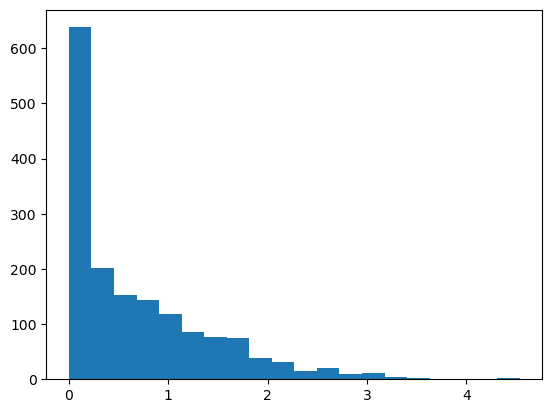

In [8]:
plt.hist(labels[mask.to(bool)], bins=20)

In [226]:
helsinki_dataloader = helsinki_dm.test_dataloader()

for batch in helsinki_dataloader:
    sys.exit(0)

SystemExit: 0

/dartfs/rc/lab/F/FinnLab/tommy/conda/envs/prosody/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [47]:
# modeling_dir = os.path.join(BASE_DIR, 'code/modeling/joint-clm-prosody')

data_module = WaveletDataModule(
    dataset_name = 'gigaspeech',
    data_dir = '/dartfs/rc/lab/F/FinnLab/datasets/gigaspeech/prosody/',
    model_name = "gpt2",
    batch_size=32,
)

data_module.setup(stage="test")


Using GPT2 tokenizer


/dartfs/rc/lab/F/FinnLab/tommy/conda/envs/prosody/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Dataloader: padding with token id: 50256
Loading data from /dartfs/rc/lab/F/FinnLab/datasets/gigaspeech/prosody


Preprocessing samples: 100%|██████████| 19815/19815 [00:31<00:00, 630.76it/s]

Failed 1621/19815


In [216]:
for batch in data_module.test_dataloader():
    sys.exit(0)

SystemExit: 0

/dartfs/rc/lab/F/FinnLab/tommy/conda/envs/prosody/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [359]:
import pandas as pd
import numpy as np

def batch_average(df, batch_size, columns):
    """
    Average a DataFrame into batches of specified size.
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame to be batched
    batch_size (int): Size of each batch
    
    Returns:
    pandas.DataFrame: DataFrame with averaged batches
    """
    # Calculate number of complete batches
    n_batches = len(df) // batch_size
    
    # Handle case where DataFrame length isn't divisible by batch_size
    remainder = len(df) % batch_size
    
    # If there's no perfect division, we'll need one more batch
    if remainder > 0:
        n_batches += 1
    
    # Create list to store batch averages
    batch_averages = []
    
    # Process complete batches
    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, len(df))  # Use min to handle last batch
        
        # Calculate average for current batch
        batch_avg = df.iloc[start_idx:end_idx]
        batch_avg = batch_avg[columns].mean()
        batch_avg['batch_number'] = i  # Add batch number for reference
        batch_averages.append(batch_avg)
    
    # Combine all batch averages into a new DataFrame
    return pd.DataFrame(batch_averages)

In [461]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

dataset = 'helsinki'
batch_size = 32
results_fns = glob.glob(os.path.join(BASE_DIR, f'derivatives/joint-prosody-clm/*{dataset}*'))
df_results = pd.concat([pd.read_csv(fn) for fn in results_fns if 'yoked' not in fn]).reset_index(drop=True)

df_stack = []

for i, df in df_results.groupby('model_name'):
    df = batch_average(df, batch_size=batch_size, columns=['loss', 'clm_loss', 'accuracy'])
    df['model_name'] = i
    df['perplexity'] = np.exp(df['clm_loss'])
    df_stack.append(df)

df_results = pd.concat(df_stack).reset_index(drop=True)

# Get order of models by binary accuracy
ordered_accuracy = df_results.loc[:,['model_name', 'accuracy', 'perplexity']] \
    .groupby(['model_name']) \
    .mean()

# get max chance of null models
null_models = ordered_accuracy.index.str.contains('shuffle')
accuracy_chance = ordered_accuracy.loc[null_models, 'accuracy'].max()
perplexity_chance = ordered_accuracy.loc[null_models, 'perplexity'].min()

# order models by accuracy
ordered_accuracy = ordered_accuracy[~null_models]
ordered_models = ordered_accuracy.sort_values(by=f'accuracy').index[::-1]

# ordered_models = ordered_models[~null_models]

# remove the null models
df_results = df_results[~df_results['model_name'].str.contains('shuffle')]

In [462]:
model_name_mapping = {
    f'{dataset}-prosody_scratch-gpt2_joint-loss_prosody-embed': 'GPT2 Prosody (Joint Loss)',
    f'{dataset}-prosody_scratch-gpt2_clm-loss_prosody-embed': 'GPT2 Prosody',
    f'{dataset}-prosody_scratch-gpt2_clm-loss_no-prosody-embed': 'GPT2'
}

df_results['model_name'] = df_results['model_name'].apply(lambda x: model_name_mapping[x])
ordered_models = [model_name_mapping[model] for model in ordered_models]


### Plot the model accuracy

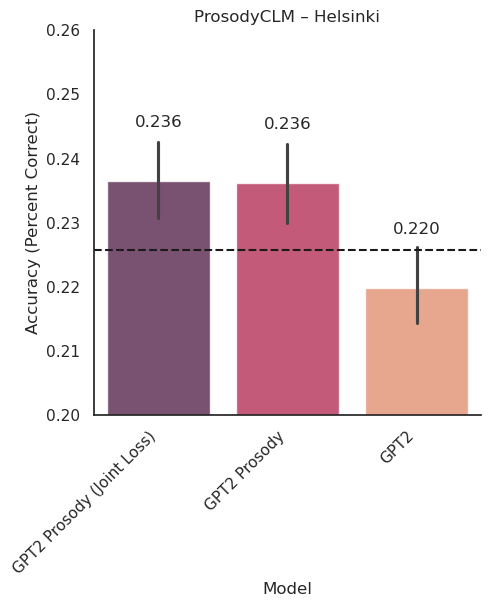

In [463]:
sns.set(style='white', rc={'figure.figsize': (5,5)})

ax = sns.barplot(data=df_results, x="model_name", y="accuracy", palette="rocket", alpha=0.8, order=ordered_models) #, estimator=np.median) 

plt.xlabel('Model')
plt.ylabel('Accuracy (Percent Correct)')

plt.title(f'ProsodyCLM – {dataset.capitalize()}')
plt.xticks(rotation=45, ha='right')

if dataset == 'helsinki':
    plt.ylim([0.2, 0.26])
elif dataset == 'gigaspeech':
    plt.ylim([0.15, 0.21])

plt.axhline(y=accuracy_chance, color='k', linestyle='--')

sns.despine()

# Add text labels on top of each bar
for p, acc in zip(ax.patches, ordered_accuracy['accuracy'][::-1]):  # Loop over each bar
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,  # X coordinate
        height + 0.008,                          # Y coordinate (top of the bar)
        f'{acc:.3f}',                 # Text label (formatted to 2 decimal places)
        ha='center',                     # Center alignment
        va='bottom'                      # Bottom alignment (just above the bar)
    )


### Plot model perplexity

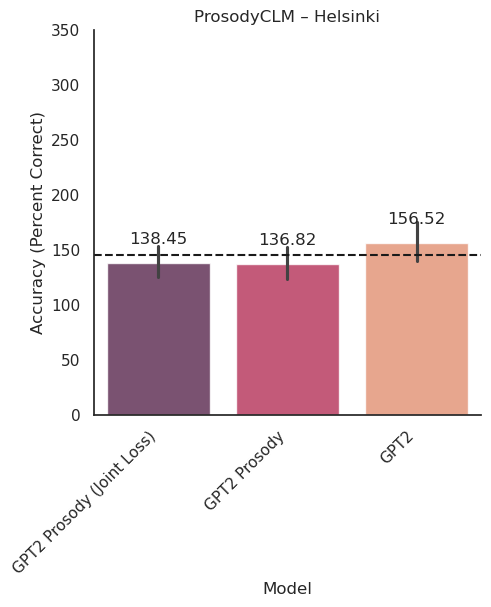

In [466]:
sns.set(style='white', rc={'figure.figsize': (5,5)})

ax = sns.barplot(data=df_results, x="model_name", y="perplexity", palette="rocket", alpha=0.8, \
    order=ordered_models)

plt.xlabel('Model')
plt.ylabel('Accuracy (Percent Correct)')

plt.title(f'ProsodyCLM – {dataset.capitalize()}')
plt.xticks(rotation=45, ha='right')

if dataset == 'helsinki':
    plt.ylim([0, 350])
elif dataset == 'gigaspeech':
    plt.ylim([0, 350])

plt.axhline(y=perplexity_chance, color='k', linestyle='--')

sns.despine()

# Add text labels on top of each bar
for p, acc in zip(ax.patches, ordered_accuracy['perplexity'][::-1]):  # Loop over each bar
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,  # X coordinate
        height + 15,                          # Y coordinate (top of the bar)
        f'{acc:.2f}',                 # Text label (formatted to 2 decimal places)
        ha='center',                     # Center alignment
        va='bottom'                      # Bottom alignment (just above the bar)
    )
